In [183]:
# lets have a look to raw data
# 1. Data Processing

In [203]:
#Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [204]:
# Path to dataset
file_path = r"C:\Users\begar\OneDrive\Projets\Intellab\Formations\DSTI\Projet\data\books.csv"

In [205]:
#Load the data
warnings.filterwarnings("ignore")
df = pd.read_csv(file_path, sep=",", error_bad_lines=False, index_col="bookID")

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [206]:
# Drop rows with missing ratings_count
df = df.dropna(subset=['ratings_count'])

In [207]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [208]:
#2. Data analysis and cleaning
data_types = df.dtypes
print(df.dtypes)

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object


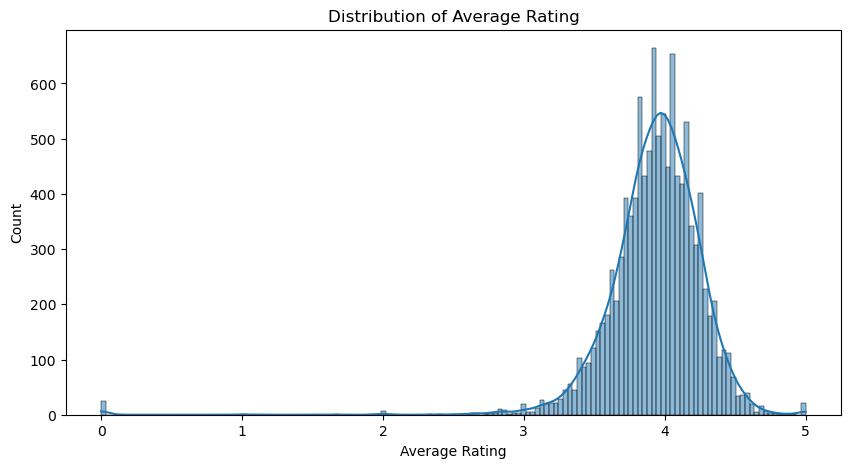

In [209]:
#Variables distribution

# Plot distribution of average rating
plt.figure(figsize=(10, 5))
sns.histplot(df['average_rating'], kde=True)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.show()

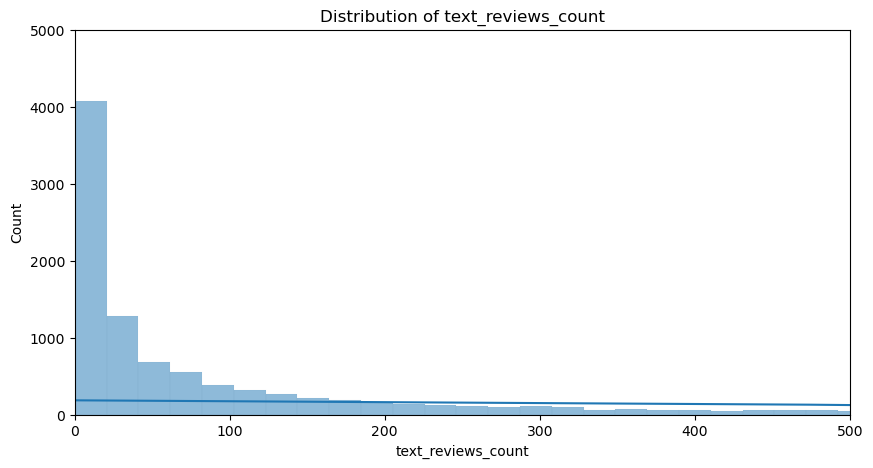

In [210]:
# Plot distribution of text_reviews_count 
plt.figure(figsize=(10, 5))
sns.histplot(df['text_reviews_count'], kde=True)
plt.title('Distribution of text_reviews_count')
plt.xlabel('text_reviews_count')
plt.xlim(0, 500)
plt.ylim(0, 5000)
plt.show()

In [211]:
#Bins for categories
bins = [0,50,100,500, 1000, 2000, 3000, 4000, df['text_reviews_count'].max()]

# Implement text_reviews_count in bins
df['text_reviews_bins'] = pd.cut(df['text_reviews_count'], bins=bins, right=False)

# Amount of books in each bin
books_count = df['text_reviews_bins'].value_counts().sort_index()

print(books_count)

[0, 50)          5678
[50, 100)        1253
[100, 500)       2383
[500, 1000)       732
[1000, 2000)      477
[2000, 3000)      205
[3000, 4000)       99
[4000, 94265)     295
Name: text_reviews_bins, dtype: int64


In [212]:
#Proportion per catergories in %
books_proportion = (books_count / df.shape[0]) * 100
print(books_proportion)

[0, 50)          51.047379
[50, 100)        11.264947
[100, 500)       21.424076
[500, 1000)       6.580958
[1000, 2000)      4.288411
[2000, 3000)      1.843028
[3000, 4000)      0.890048
[4000, 94265)     2.652162
Name: text_reviews_bins, dtype: float64


In [213]:
#Resized bins for categories
bins = [0,50,100,500, 1000, 2000, 3000, 4000, df['text_reviews_count'].max()]

# Implement text_reviews_count into bins
df['text_reviews_bins'] = pd.cut(df['text_reviews_count'], bins=bins, right=False)

# Count the number of books in each bin
books_count = df['text_reviews_bins'].value_counts().sort_index()

print(books_count)

[0, 50)          5678
[50, 100)        1253
[100, 500)       2383
[500, 1000)       732
[1000, 2000)      477
[2000, 3000)      205
[3000, 4000)       99
[4000, 94265)     295
Name: text_reviews_bins, dtype: int64


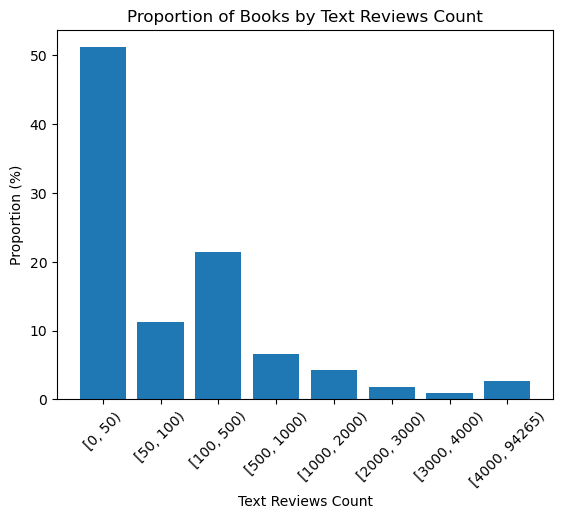

In [214]:

# Plot the books_proportion
plt.bar(books_proportion.index.astype(str), books_proportion)
plt.xlabel('Text Reviews Count')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Books by Text Reviews Count')
plt.xticks(rotation=45)
plt.show()

## Conlusion : Most of our books have les then 500 textrewiews

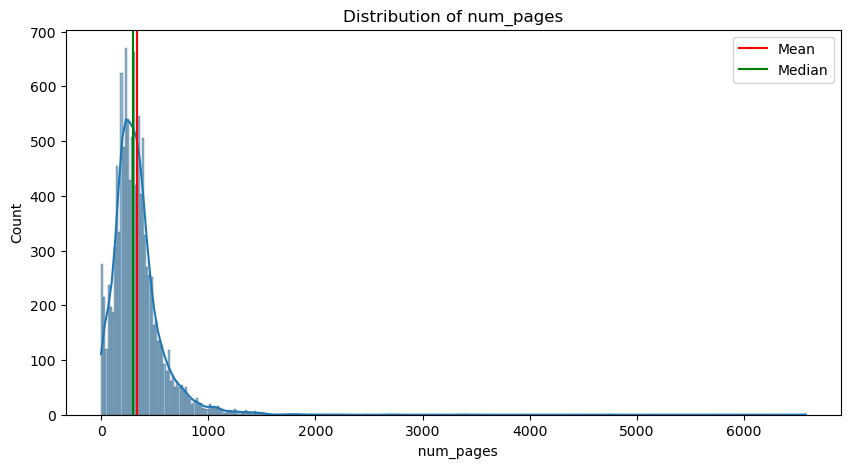

Mean of num_pages: 336.4055560550211
Median of num_pages: 299.0


In [215]:
# Plot distribution of num_pages
mean_value = df['  num_pages'].mean()
median_value = df['  num_pages'].median()
plt.figure(figsize=(10, 5))
sns.histplot(df['  num_pages'], kde=True)
plt.axvline(mean_value, color='r', linestyle='-', label='Mean')
plt.axvline(median_value, color='g', linestyle='-', label='Median')
plt.legend()
plt.title('Distribution of num_pages')
plt.xlabel('  num_pages')
plt.show()

print(f"Mean of num_pages: {mean_value}")
print(f"Median of num_pages: {median_value}")

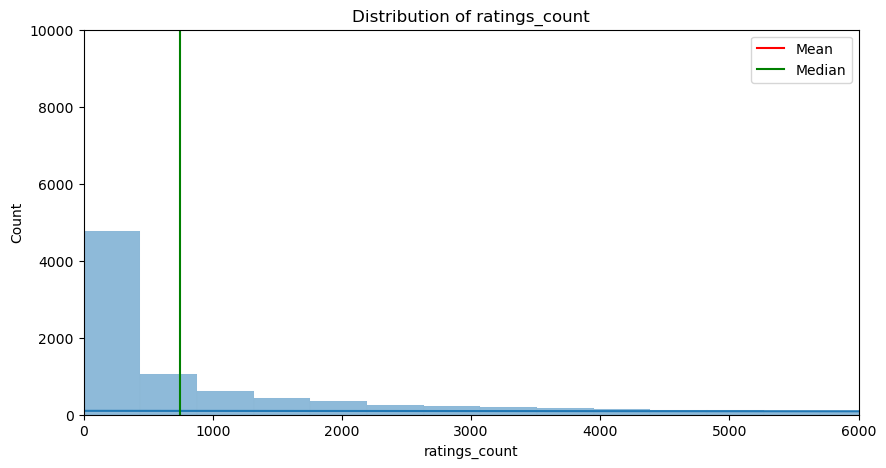

In [216]:
# Plot distribution of rating_count
# Plot distribution of ratings_count
plt.figure(figsize=(10, 5))
sns.histplot(df['ratings_count'], kde=True)
plt.axvline(df['ratings_count'].mean(), color='r', linestyle='-', label='Mean')
plt.axvline(df['ratings_count'].median(), color='g', linestyle='-', label='Median')
plt.legend()
plt.title('Distribution of ratings_count')
plt.xlabel('ratings_count')
plt.xlim(0, 6000)
plt.ylim(0, 10000)
plt.show()

In [217]:
#Resized bins for categories to have a closer look at rating_count between 0 and 100
bins = [0, 10, 20, 30, 40, 50, 100, 500, 1000, 2000, 3000, 4000, df['ratings_count'].max()]

# Implement text_reviews_count into bins
df['ratings_count'] = pd.cut(df['ratings_count'], bins=bins, right=False)

# Count the number of books in each bin
n_books = df['ratings_count'].value_counts().sort_index()

print(n_books)

[0, 10)             673
[10, 20)            435
[20, 30)            318
[30, 40)            262
[40, 50)            197
[50, 100)           836
[100, 500)         2249
[500, 1000)        1039
[1000, 2000)       1038
[2000, 3000)        600
[3000, 4000)        406
[4000, 4597666)    3069
Name: ratings_count, dtype: int64


TypeError: Horizontal orientation requires numeric `x` variable.

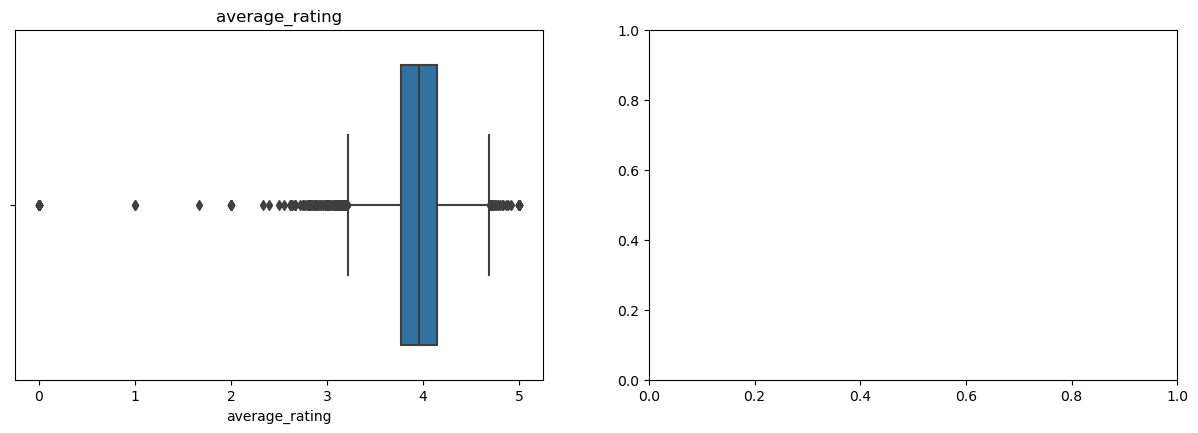

In [218]:
# Lets have a look at the outliers
cls = ['average_rating', 'ratings_count']

# create a figure with subplots
plt.figure(figsize=(15,10))

for i, cl in enumerate(cls):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[cl])
    plt.title(cl)

plt.tight_layout()
plt.show()


In [ ]:
#how does the data correlate ?
columns = ['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count']
correlation_matrix = df[columns].corr()

# how the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## Cleaning the data

In [ ]:
# Convert categorical columns to object datatype
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].astype('object')
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Fill aLL missing values
df = df.fillna("NA")

In [ ]:
# Convert dates to datetime
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

In [ ]:
# function to remove outliers with IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#Remove outliers from average rating
df = remove_outliers(df, "average_rating")

In [ ]:
# Plot distribution of average rating
plt.figure(figsize=(10, 5))
sns.histplot(df['average_rating'], kde=True)
plt.title('Distribution of Average Rating (withou outliers')
plt.xlabel('Average Rating')
plt.show()

In [ ]:
# Remove books with ratings_count below 50
df = df[df['ratings_count'] >= 50]

In [ ]:
#Remove isbn and isbn13
df =df.drop(['isbn', 'isbn13'], axis=1, inplace=True)

In [219]:
# feature extraction
current_year = datetime.now().year
df['book_age'] = current_year - df['publication_date'].dt.year


NameError: name 'datetime' is not defined